# US Census Data API in Mathematica

by Vishank Patel

**U.S. Census API documentation:** https://www.census.gov/data/developers/about.html

**U.S. Census Data Discovery Tool:** https://api.census.gov/data.html

These recipe examples were tested on March 16, 2022.

See also the [U.S. Census API Terms of Service](https://www.census.gov/data/developers/about/terms-of-service.html)

**Attribution:** *This tutorial uses the Census Bureau Data API but is not endorsed or certified by the Census Bureau.*

### API Key Information

While an API key is not required to use the U.S. Census Data API, you may consider registering for an API key as the API is limited to 500 calls a day without a key. Sign up can be found here: https://api.census.gov/data/key_signup.html

If you do not use an API Key, create an empty string: `myAPIKey = ""`. However, if using an API key, save it to a text file and import the key as follows:

In [ ]:
myAPIKey = Import["ADD PATH HERE"];

## 1. Get population estimates of counties by State

*Note: Includes Washington, D.C. and Puerto Rico*

Define root Census API and get state IDs:

In [ ]:
api = "https://api.census.gov/data/";

(*Define api url for the state ids
We will use the Population Estimates from 2019 dataset
https://api.census.gov/data/2019/pep/population/examples.html*)

stateIDsURL = api <> "2019/pep/population?get=NAME&for=state:*&key=" <> myAPIKey;
rawStateIDs = Import[stateIDsURL, "JSON"];
rawStateIDs[[;; 10]]

{{NAME, state}, {Alabama, 01}, {Alaska, 02}, {Arizona, 04}, {Arkansas, 05}, 
 
>   {California, 06}, {Colorado, 08}, {Delaware, 10}, {District of Columbia, 11}, 
 
>   {Idaho, 16}}

Remove the headers and display the first 10 elements:

In [ ]:
stateIDs = rawStateIDs[[2 ;;]];
stateIDs[[;; 10]]

{{Alabama, 01}, {Alaska, 02}, {Arizona, 04}, {Arkansas, 05}, {California, 06}, 
 
>   {Colorado, 08}, {Delaware, 10}, {District of Columbia, 11}, {Idaho, 16}, 
 
>   {Connecticut, 09}}

Now we can loop through each state and pull their individual population data:

In [ ]:
countyData = <||>;
For[i = 1, i <= Length[stateIDs], i++,
 
 stateName = stateIDs[[i, 1]];
 stateID = stateIDs[[i, 2]];
 
 countyImport = Import[api <> "2019/pep/population?get=NAME,POP&for=county:*&in=state:" <> stateID <> "&key=" <> myAPIKey, "JSON"][[2 ;;]][[All, {1, 2}]]; 
 (* [[2;;]] removes the headers from the import, then [[All,{1,2}]] grabs the county name and population*)
 AppendTo[countyData, stateName -> countyImport];
 Pause[1]
 ]

In [ ]:
countyData // Short

<|Alabama -> {{St. Clair County, Alabama, 89512}, <<66>>}, <<51>>|>

To show the counties from Alabama:

{{St. Clair County, Alabama, 89512}, {Cullman County, Alabama, 83768}, 
 
>   {Coosa County, Alabama, 10663}, {Pickens County, Alabama, 19930}, 
 
>   {Sumter County, Alabama, 12427}, {Jefferson County, Alabama, 658573}, 
 
>   {Houston County, Alabama, 105882}, {Lamar County, Alabama, 13805}, 
 
>   {Tuscaloosa County, Alabama, 209355}, {Walker County, Alabama, 63521}, <<57>>}
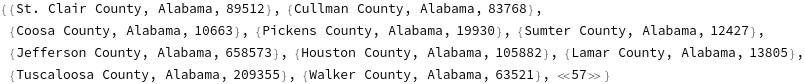

In [ ]:
countyData["Alabama"] // Shallow

## 2. Get population estimates over a range of years

We can use similar code as before, but now loop through different population estimate datasets by year. Here are the specific APIs used:

Vintage 2015 Population Estimates: https://api.census.gov/data/2015/pep/population/examples.html

Vintage 2016 Population Estimates: https://api.census.gov/data/2016/pep/population/examples.html

Vintage 2017 Population Estimates: https://api.census.gov/data/2017/pep/population/examples.html


In [ ]:
yearList = {"2015", "2016", "2017"};   

(*Make sure the years in the list are strings as we will concatenate them to the URL below*)

countyDatabyYear = <||>;

For[i = 1, i <= Length[stateIDs], i++,
 For[j = 1, j <= Length[yearList], j++,
  
  stateName = stateIDs[[i, 1]];
  stateID = stateIDs[[i, 2]];
  year = yearList[[j]];
  
  countyYearedDataURL = api <> year <> "/pep/population?get=GEONAME,POP&for=county:*&in=state:" <> stateID <> "&key=" <> myAPIKey;
  countyYearedImport = Import[countyYearedDataURL, "JSON"][[2 ;;]][[All, {1, 2}]];
  AppendTo[countyDatabyYear, stateName -> <|year -> countyYearedImport|>];
  Pause[1]
  ]
 ]

In [ ]:
countyDatabyYear // Short

<|Alabama -> <|2017 -> {{Cone<<17>>ma, 12469}, <<66>>}|>, <<51>>|>

## 3. Plot Population Change

This data is based off the 2021 Population Estimates dataset: 
https://api.census.gov/data/2021/pep/population/variables.html

The percentage change in population is from July 1, 2020 to July 1, 2021 for states (includes Washington, D.C. and Puerto Rico)

In [ ]:
popChangeURL = api <> "2021/pep/population?get=NAME,POP_2021,PPOPCHG_2021&for=state:*&key=" <> myAPIKey;
rawPopChangeData = Import[popChangeURL, "JSON"];
rawPopChangeData[[;; 10]]

{{NAME, POP_2021, PPOPCHG_2021, state}, {Oklahoma, 3986639, 0.6210955947, 40}, 
 
>   {Nebraska, 1963692, 0.1140479899, 31}, {Hawaii, 1441553, -0.7134046100, 15}, 
 
>   {South Dakota, 895376, 0.9330412953, 46}, {Tennessee, 6975218, 0.7962146316, 47}, 
 
>   {Nevada, 3143991, 0.9608001873, 32}, {New Mexico, 2115877, -0.0797613860, 35}, 
 
>   {Iowa, 3193079, 0.1383022195, 19}, {Kansas, 2934582, -0.0442116160, 20}}

Preparing the data for plotting,

{{Oklahoma, Nebraska, Hawaii, South Dakota, Tennessee, Nevada, New Mexico, Iowa, Kansas, 
 
>    District of Columbia, <<42>>}, 
 
>   {0.6210955947, 0.1140479899, -0.7134046100, 0.9330412953, 0.7962146316, 
 
>    0.9608001873, -0.0797613860, 0.1383022195, -0.0442116160, -2.9043911470, <<42>>}}
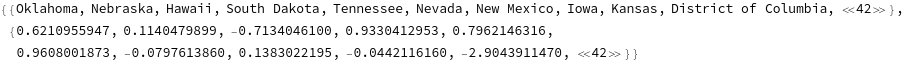

In [ ]:
popChangeData = {rawPopChangeData[[2 ;;]][[All, 1]], rawPopChangeData[[2 ;;]][[All, 3]]};
popChangeData // Shallow

In [ ]:
transposedPopChangeData = Sort[Transpose[popChangeData]];
transposedPopChangeData[[;; 10]]

{{Alabama, 0.2999918604}, {Alaska, 0.0316749062}, {Arizona, 1.3698828613}, 
 
>   {Arkansas, 0.4534511286}, {California, -0.6630474360}, {Colorado, 0.4799364073}, 
 
>   {Connecticut, 0.1482392938}, {Delaware, 1.1592057958}, 
 
>   {District of Columbia, -2.9043911470}, {Florida, 0.9791222337}}

-Graphics-
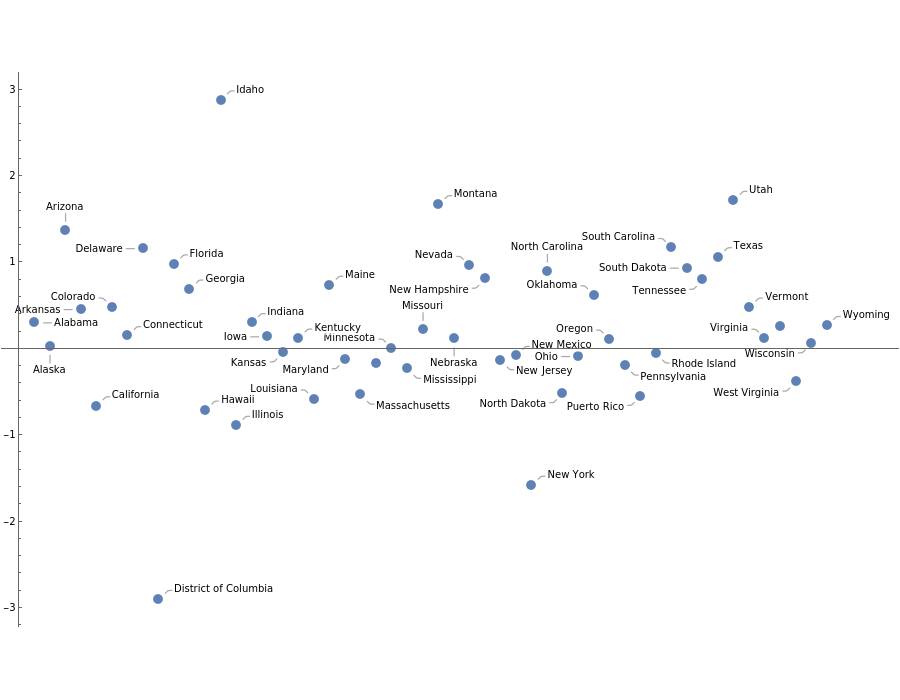

In [ ]:
ListPlot[
 ToExpression[transposedPopChangeData[[All, 2]]] -> transposedPopChangeData[[All, 1]],
 ImageSize -> {900, 700},
 Ticks -> {False, True}]